In [1]:
import numpy as np
import pandas as pd
import gsd.hoomd

In [2]:
def autocorrFFT(x):
      N=len(x)
      F = np.fft.fft(x, n=2*N)  #2*N because of zero-padding
      PSD = F * F.conjugate()
      res = np.fft.ifft(PSD)
      res= (res[:N]).real   #now we have the autocorrelation in convention B
      n=N*np.ones(N)-np.arange(0,N) #divide res(m) by (N-m)
      return res/n #this is the autocorrelation in convention A

In [2]:
a=gsd.hoomd.open("20_1_12_1_npt_finer.gsd")

In [3]:
a

In [9]:
velocity=[]

In [10]:
for i in range(200,2000):
    velocity1=a[i].particles.velocity
    velocity.append(velocity1)

In [11]:
velocity

[array([[ 0.06501906, -0.10933457,  0.        ],
        [-0.23364878, -0.03399507,  0.        ],
        [ 0.3176171 , -0.05779286,  0.        ],
        ...,
        [-0.10720555, -0.12466285,  0.        ],
        [ 0.05493056, -0.07322546,  0.        ],
        [-0.01463765, -0.32270214,  0.        ]], dtype=float32),
 array([[ 0.06427673, -0.02158518,  0.        ],
        [-0.23143993, -0.0423716 ,  0.        ],
        [ 0.33848393, -0.04645382,  0.        ],
        ...,
        [-0.11990581, -0.13650769,  0.        ],
        [ 0.04938613, -0.08603039,  0.        ],
        [-0.04287366, -0.37456194,  0.        ]], dtype=float32),
 array([[ 0.02606265,  0.06442559,  0.        ],
        [-0.22685258, -0.0407041 ,  0.        ],
        [ 0.35233116, -0.03587824,  0.        ],
        ...,
        [-0.1272285 , -0.15001413,  0.        ],
        [ 0.04469527, -0.09929504,  0.        ],
        [-0.06601202, -0.41676885,  0.        ]], dtype=float32),
 array([[-0.03904104,  0.120

In [12]:
varray=np.array(velocity)

In [13]:
varray.shape

(1800, 5200, 3)

In [14]:
vlarge=varray[:,0::13,:]


In [15]:
vlarge.shape

(1800, 400, 3)

In [16]:
vlarge=np.swapaxes(vlarge,0,1)

In [17]:
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real

In [21]:
PSD_sum[:1800]

array([4.79810909e+04, 4.68733120e+04, 6.58146028e+04, ...,
       1.40459197e+01, 1.47612236e+01, 1.40579673e+01])

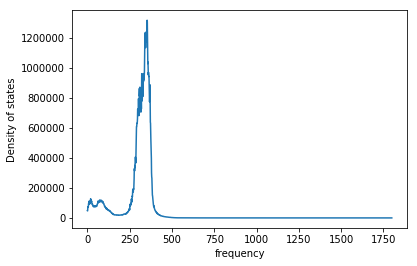

In [29]:
import matplotlib.pyplot as plt
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')

plt.savefig('T_0.05.png')

In [30]:
velocity=[]
for i in range(2200,4000):
    velocity1=a[i].particles.velocity
    velocity.append(velocity1)
varray=np.array(velocity)
vlarge=varray[:,0::13,:]
vlarge=np.swapaxes(vlarge,0,1)
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real


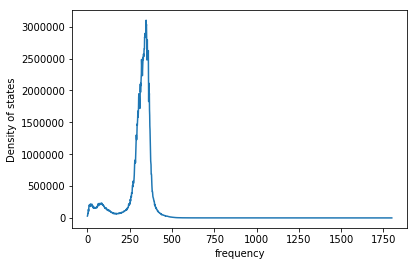

In [32]:
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')
plt.savefig('T_0.10.png')

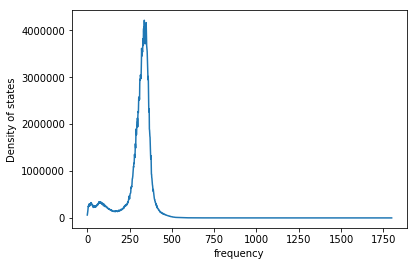

In [33]:
velocity=[]
for i in range(4200,6000):
    velocity1=a[i].particles.velocity
    velocity.append(velocity1)
varray=np.array(velocity)
vlarge=varray[:,0::13,:]
vlarge=np.swapaxes(vlarge,0,1)
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')
plt.savefig('T_0.15.png')

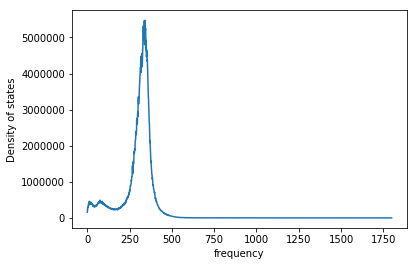

In [34]:
velocity=[]
for i in range(6200,8000):
    velocity1=a[i].particles.velocity
    velocity.append(velocity1)
varray=np.array(velocity)
vlarge=varray[:,0::13,:]
vlarge=np.swapaxes(vlarge,0,1)
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')
plt.savefig('T_0.20.png')

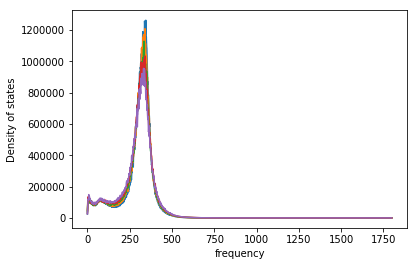

In [38]:
for m in range(5,10):
    velocity=[]
    for i in range(m*2000-1800,m*2000):
        velocity1=a[i].particles.velocity
        velocity.append(velocity1)
    varray=np.array(velocity)
    vlarge=varray[:,0::13,:]
    vlarge=np.swapaxes(vlarge,0,1)
    i=vlarge[1,:,0]
    N=len(i)
    F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    PSD_sum=PSD.real
    for j in range(0,3):
        for i in vlarge:
            N=len(i[:,j])
            F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
            PSD = F * F.conjugate()
            PSD_sum+=PSD.real
    plt.plot(PSD_sum[0:1800]/m,label='T%f'%(m*0.05))

    plt.xlabel('frequency')
    plt.ylabel('Density of states')
    plt.savefig('T_%f.png'%(m*0.05))

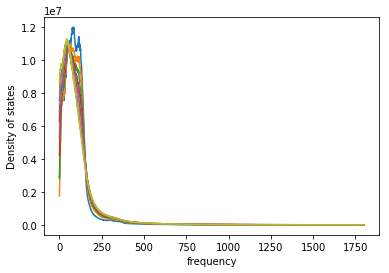

In [45]:
for m in range(1,10):
    velocity=[]
    for i in range(m*2000-1800,m*2000):
        velocity1=a[i].particles.velocity
        velocity.append(velocity1)
    varray=np.array(velocity)
    vsmall=np.delete(varray,np.s_[0::13],axis=1)
    vsmall=np.swapaxes(vsmall,0,1)
    i=vsmall[1,:,0]
    N=len(i)
    F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    PSD_sum=PSD.real
    for j in range(0,3):
        for i in vsmall:
            N=len(i[:,j])
            F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
            PSD = F * F.conjugate()
            PSD_sum+=PSD.real
    plt.plot(PSD_sum[0:1800]/m,label='T%f'%(m*0.05))

    plt.xlabel('frequency')
    plt.ylabel('Density of states')
    plt.savefig('T_%f.png'%(m*0.05))